In [1]:
import sys
import math
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import random
import seaborn
from scipy.stats import t, chi2, f, norm, poisson, binom, uniform, multivariate_normal

np.set_printoptions(suppress = True)

# Урок 3

In [2]:
# 1. Симулируйте выборку объемом в 10000
#    наблюдений из распределения:
#    1)     Хи-Квадрат с 5-ю степенями свободы
#    2)     Стьюдента с 10-ю степенями свободы
#    3)     Нормального с математическим ожиданием 10
#           и дисперсией 25

x = chi2.rvs(df=5, size=10000)
y = t.rvs(df=10, size=10000)
z = norm.rvs(loc=10, scale=25, size=10000)

In [3]:
# 2. Симулируйте выборку из Хи-Квадрат распределения
#    с 10-ю степенями свободы. При помощи ЗБЧ найдите
#    аппроксимации:
#    1)    E(X)
#    2)    E(X ^ 3)
#    2)    Var(X)
#    3*)   Median(X)
#    4)    P(X <= 1.7)
#    5*)   квантиль X уровня 0.3
#    6)    Var(sin(X))

x = chi2.rvs(df=10, size=500)
print(np.mean(x),
      np.mean(x**3),
      np.var(x),
      np.median(x),
      np.mean(x <= 1.7),
      np.quantile(x, 0.3),
      np.var(np.sin(x)),
      sep='\n')

9.825293036359152
1511.5223849702843
17.54885802521318
9.298979621153093
0.002
7.424680466037623
0.5154685746985795


In [4]:
# 3. Пусть X и Y независимые случайные величины, причем
#    X~U(1,5) и Y~chi2(5). При помощи ЗБЧ аппроксимируйте:
#    1)    E(X + Y)
#    2)    P(X - Y <= 2)
#    3)    Var(X / Y)

x = []
for i in range(1000):
    x.append(random.random()*4+1)
x = np.array(x)

y = chi2.rvs(df=5, size=1000)

print(np.mean(x+y),
      np.mean(x - y <= 2),
      np.var(x/y),
      sep='\n')

8.041374668066544
0.916
2.061940608025848


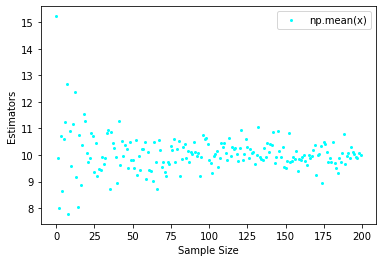

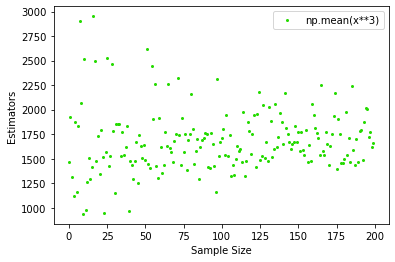

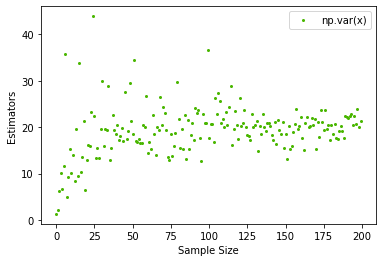

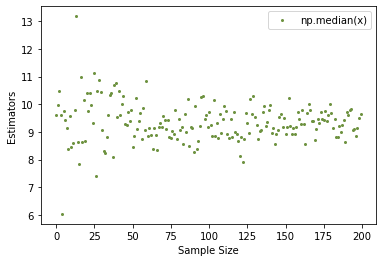

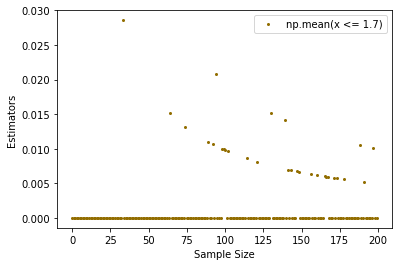

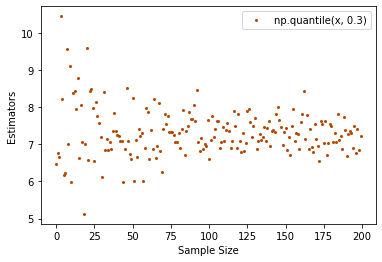

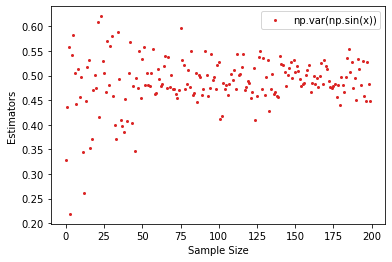

In [5]:
# 4. В предыдущих задачах постройте графики, демонстрирующие,
#    что вероятность отклонения аппроксимаций от истинных
#    значений снижается по мере увеличения объема выборки.
#    В качестве метрики используйте:
#    1*)   Абсолютное отклонение
#    2*)   Квадрат абсолютного отклонения


def MyGraph(estimators, dist_name, size=200, **func_args):
    estims = []
    for j in range(len(estimators)):
        estims.append([])
        for n in range(size):
            x = eval(dist_name).rvs(size=n+2, **func_args)
            estims[j].append(eval(estimators[j]))
        
        plt.xlabel('Sample Size')
        plt.ylabel('Estimators')
        plt.plot(estims[j], 'ro', markersize=2,
                 color=(j / len(estimators), 1 - j / len(estimators), int(j % 3 == 0) / (j + 1)), label=estimators[j])
        plt.legend()
        plt.show()


MyGraph(['np.mean(x)',
         'np.mean(x**3)',
         'np.var(x)',
         'np.median(x)',
         'np.mean(x <= 1.7)',
         'np.quantile(x, 0.3)',
         'np.var(np.sin(x))'], 'chi2', df=10)

In [6]:
# 5. Не используя встроенные функции симулируйте выборку из:
#    1)    Распределения Бернулли с параметром p = 0.3
#    2)    Биномиального распределения с
#          параметрами n = 5, p = 0.3 (используйте встроенную квантильную функцию)
#    3)    Экспоненциального распределения с параметром lambda = 5
#    4)    Нормального распределения с
#          параметрами mu = 5, sigma = 25 (используйте встроенную квантильную функцию)
#    5*)   Геометрического распределения с
#          вероятностью успеха 0.3
#    6**)  Распределения Пуассона с математическим
#          ожидаем 5
#    7**)  Суммы распределений из предыдущих двух пунктов,
#          предполагая независимость.

def ber(p, size=100):
    x = []
    for i in range(size):
        x.append((random.random() < p)*1)
    return x


def binomial(p, n, size=100):
    res = np.zeros(size)
    for i in range(n):
        res += ber(p, size=size)
    return res


def for_exp(l):
    return -(np.log(1-random.random()))/l


def exp(l, size=100):
    return np.asarray([for_exp(l) for _ in range(size)])


def for_geom(p):
    sum = 0
    while random.random() > p:
        sum += 1
    return sum


def geom(p, size=100):
    return np.asarray([for_geom(p) for _ in range(size)])

# Урок 4

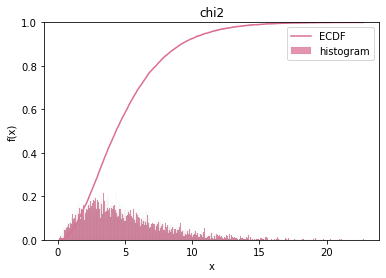

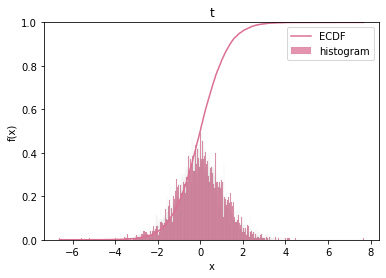

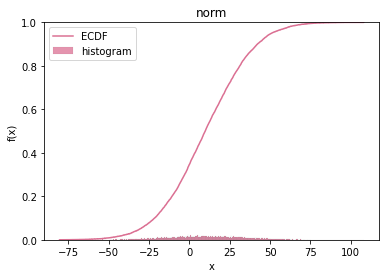

In [7]:
# 1. Постройте графики гистограммы и выборочной
#    функции распредленеия для распределений:
#    1)     Хи-Квадрат с 5-ю степенями свободы
#    2)     Стьюдента с 10-ю степенями свободы
#    3)     Нормального с математическим ожиданием 10
#           и дисперсией 25

def PlotIt1(name, size=100, **kwargs):
    x = eval(name).rvs(size=size,
                       **kwargs)
    x = np.sort(x)

    F_x = eval(name).cdf(x, **kwargs)
    plt.xlabel('x')
    plt.ylabel('F(x)')
    seaborn.ecdfplot(x, 
                     label="ECDF",
                     color="palevioletred")
    f_x = eval(name).pdf(x, **kwargs)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    seaborn.histplot(x, stat='density',
                     color="palevioletred",
                     label="histogram",
                     bins=size//10)
    plt.title(name)
    plt.legend()
    plt.show()
    pass

PlotIt1('chi2', size=10000, df=5)
PlotIt1('t', size=10000, df=10)
PlotIt1('norm', size=10000, loc=10, scale=25)

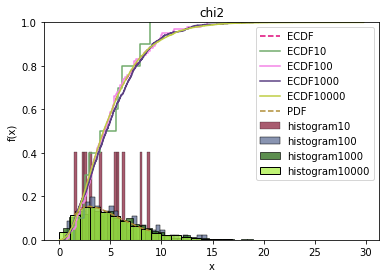

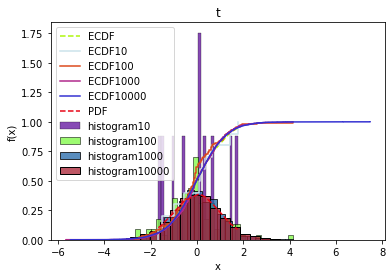

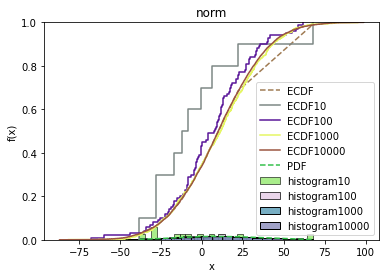

In [19]:
# 2. В каждом пункте предыдущего задания проверьте,
#    как объем выборки влияет на то, насколько близки
#    окажутся выборочные и истинные характеристики
#    распределения. Сравните выборки объемом
#    в 10, 100, 1000 и 10000 наблюдений. При увеличении
#    объема выборки увеличивайте число столбиков
#    в гистограмме.

def PlotIt2(name, **kwargs):
    x = eval(name).rvs(size=10,
                       **kwargs)
    x = np.sort(x)

    x1 = eval(name).rvs(size=100,
                       **kwargs)
    x1 = np.sort(x1)

    x2 = eval(name).rvs(size=1000,
                       **kwargs)
    x2 = np.sort(x2)

    x3 = eval(name).rvs(size=10000,
                       **kwargs)
    x3 = np.sort(x3)

    F_x = eval(name).cdf(x, **kwargs)
    plt.xlabel('x')
    plt.ylabel('F(x)')
    plt.plot(x, F_x, '--', markersize = 20,
             label = "ECDF", color = (random.random(), random.random(), random.random()))
    for i, aaaa in enumerate([x, x1, x2, x3]):
        seaborn.ecdfplot(aaaa,
                         label="ECDF"+str(10**(i+1)),
                         color=(random.random(), random.random(), random.random()))

    f_x = eval(name).pdf(x, **kwargs)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.plot(x, f_x, '--', markersize = 20,
             label = "PDF", color = (random.random(), random.random(), random.random()))
    for i, aaaa in enumerate([x, x1, x2, x3]):
        seaborn.histplot(aaaa, stat='density',
                         color=(random.random(), random.random(), random.random()),
                         label="histogram"+str(10**(i+1)),
                         bins=30)
    plt.title(name)
    plt.legend()
    plt.show()
    pass

PlotIt2('chi2', df=5)
PlotIt2('t', df=10)
PlotIt2('norm', loc=10, scale=25)

In [9]:
# 3. Самостоятельно запрограммируйте функции,
#    позволяющие рассчитывать значение выборочной
#    функции распределения для каждого:
#    1)    Наблюдения в выборке
#    2*)   Значения в произвольном векторе

def Func3(x, array):
    return len(array[(array - x) <= 0])/len(array)

In [10]:
# 4. Самостоятельно запрограммируйте функции,
#    позволяющие рассчитывать значение гистограммы
#    для каждого:
#    1)    Наблюдения в выборке
#    2*)   Значения в произвольном векторе

def Func4(x, array, n_columns):
    min_1 = min(array)
    h = (max(array) - min_1) / n_columns
    i = (x-min_1) // h
    return len(array[(array > i*h+min_1) & (array < (i+1)*h+min_1)])/(len(array) * h)

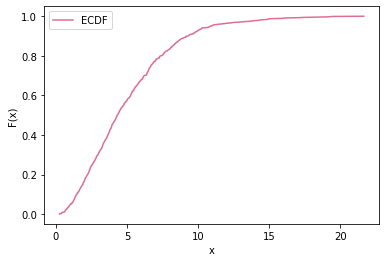

In [11]:
# 5. Самостоятельно запрограммируйте функции,
#    позволяющие по выборке строить график:
#    1)    Выборочной функции распределения
#    2*)   Гистограммы с произвольным
#          числом столбиков

def PlotGraph(array, k):
    array = np.sort(array)
    x1 = []
    x2 = []
    for el in array:
        x1.append(Func3(el, array))
        x2.append(Func4(el, array, k))

    plt.xlabel('x')
    plt.ylabel('F(x)')
    plt.plot(array, x1,
                     label="ECDF",
                     color="palevioletred")
    # plt.hist(x2, k,  # гистограмма как график выборочной функции плотности
    #                  color="palevioletred",
    #                  label="histogram")  # число столбиков в Гистограмме
    plt.legend()
    plt.show()
    pass

PlotGraph(chi2.rvs(size=1000, df=5), 1)

In [12]:
# 6. Используя ЗБЧ и несколько выборок из Хи-Квадрат
#    распределения приблизительно рассчитайте:
#    1**)  Математическое ожидание выборочной функции
#          распределения в точке 5
#    2**)  Дисперсию выборочной функции распределения
#          в точке 5

x = []
for i in range(100):
    k = chi2.rvs(df=5, size=100)
    x.append(Func3(5, k))

print(np.mean(x))
print(np.var(x))

0.5968
0.00205776


# Урок 5

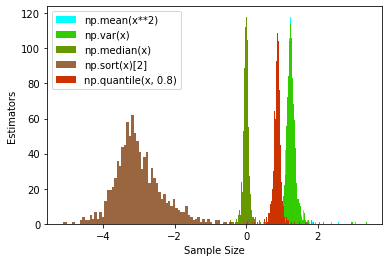

In [17]:
# 1. Визуализируйте для выборки объема 5000 из распределения
#    Стьюдента с 10-ю степенями свободы, при помощи Гистограммы,
#    распределение:
#    1)     Второго начального выборочного момента
#    2)     Выборочной дисперсии
#    3)     Выборочной медианы
#    4)     Третьей порядковой статистики, то есть
#           третьего элемента вариационного ряда
#    5)     Выборочной квантили уровня 0.8
#    6)     Выборочной функции распределения в точке 5

def MyGraph(estimators, dist_name, size=200, **func_args):
    estims = []
    for j in range(len(estimators)):
        estims.append([])
        for n in range(size):
            x = eval(dist_name).rvs(size=n+3, **func_args)
            estims[j].append(eval(estimators[j]))

    plt.xlabel('Sample Size')
    plt.ylabel('Estimators')

    for i in range(len(estimators)):
        plt.hist(estims[i], 100,
                 color=(i / len(estimators), 1 - i / len(estimators), int(i % 3 == 0) / (i + 1)), label=estimators[i])
        plt.legend()
    plt.show()


MyGraph(estimators=['np.mean(x**2)', 'np.var(x)', 'np.median(x)', 'np.sort(x)[2]', 'np.quantile(x, 0.8)'],
        dist_name='t',
        size=1000,
        df=10)

__________________________________________________
[[0.17099325 0.06922856]
 [0.06922856 0.15503963]]
[[1.         0.42518158]
 [0.42518158 1.        ]]


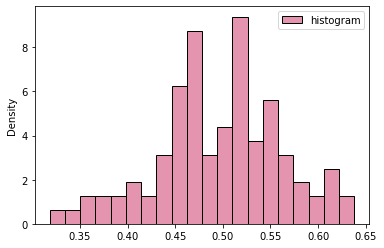

In [14]:
# 3. Симулируйте три независимых выборки объемом в 5000 наблюдений
#    из стандартного равномерного распределения. Получите из этих
#    двух выборок две сложив первую со второй, а вторую - с третьей.
#    Для получившихся выборок:
#    1)     Посчитайте выборочную ковариационную матрицу
#    2)     Рассчитайте выборочную корреляционную матрицу
#    3*)    При помощи гистограммы визуализируйте распределение
#           выборочной корреляции

print('_'*50)

exs = []
for i in range(3):
    exs.append(uniform.rvs(size=100, loc=0, scale=1))

x1 = exs[0] + exs[1]
x2 = exs[1] + exs[2]

print(np.cov(x1, x2),
      np.corrcoef(x1, x2),
      sep='\n')

x = []
for i in range(100):
    exs = []
    for j in range(3):
        exs.append(norm.rvs(size=100, loc=0, scale=1))

    x1 = exs[0] + exs[1]
    x2 = exs[1] + exs[2]
    x.append(np.corrcoef(x1, x2)[1, 0])

x = np.sort(x)
seaborn.histplot(x, stat='density',
                    color="palevioletred",
                    label="histogram",
                    bins=20)
plt.legend()
plt.show()

In [15]:
# 4. Самостоятельно запрограммируйте функции, позволяющие рассчитывать
#    1)     Выборочное среднее
#    2)     Выборочную дисперсию
#    3*)    Выборочную медиану
#    4)     Порядковые статистики
#    5*)    Выборочную ковариационную матрицу

print('_'*50)

def MyMean(x):
    return np.sum(x)/len(x)


def MyVar(x):
    return np.sum((x-MyMean(x))**2)/len(x)


def MyMedian(x):
    x = np.sort(x)
    if len(x) % 2 != 0:
        return x[len(x)//2]
    else:
        return (x[len(x)//2-1] + x[len(x)//2])/2


def MyPor(x, k):
    return np.sort(x)[k-1]


def MyCov(x, y):
    var1 = MyVar(x)*len(x)/(len(x)-1)
    var2 = MyVar(y)*len(x)/(len(x)-1)
    cov = MyMean(x*y) - MyMean(x) * MyMean(y)
    return np.array([[var1, cov],
                     [cov, var2]])

x = norm.rvs(size=100, loc=0, scale=1)
y = norm.rvs(size=100, loc=0, scale=1)
for f in ['mean', 'var', 'median']:
    print(f'{f}: {eval("np."+f)(x) == eval("My"+f.capitalize())(x)}')
print(f'cov: {np.abs((np.cov(x, y) - MyCov(x, y))) < 0.001}')

__________________________________________________
mean: True
var: True
median: True
cov: [[ True  True]
 [ True  True]]


In [16]:
# 5. Симулируйте три независимые выборки: две из стандартного нормального
#    распределения и одну из Хи-Квадрат распределения с двумя степенями
#    свободы. Сформируйте еще одну выборку сложив квадраты выборок из
#    стандартных нормальных распределений. Сравните выборочные характеристики
#    получившейся выборки с выборочными характеристиками выборки из Хи-Квадрат
#    распределения с двумя степенями свободы. Сделайте выводы о причинах
#    налблюдаемого сходства в выборочных характеристиках.

print('_'*50)
n1 = norm.rvs(size=100000)
n2 = norm.rvs(size=100000)
y = chi2.rvs(df=2, size=100000)

x = n1**2 + n2**2

for har in ['np.mean(x)', 'np.var(x)', 'np.median(x)', 'np.quantile(x, 0.3)']:
    print(f'{har[3:]}: {np.abs(eval(har) - eval(har.replace("x", "y"))) < 0.05}')

# Удивительно, как же так получилось?

__________________________________________________
mean(x): True
var(x): True
median(x): True
quantile(x, 0.3): True
